<a href="https://colab.research.google.com/github/pvhau169/MLTSA22_HPhan/blob/main/HW6/chchchchanges_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline




     |████████████████████████████████| 991 kB 19.5 MB/s 
Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

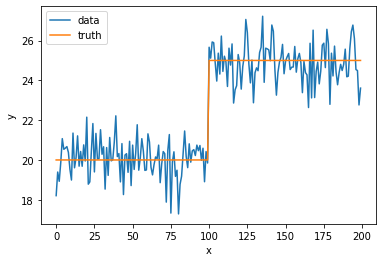

In [2]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [3]:
import numpy as np
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 20.07, mean after: 24.87


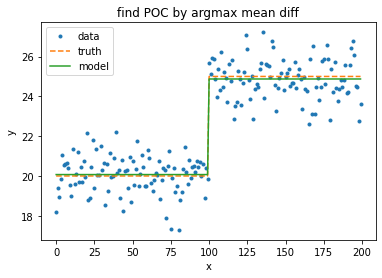

In [4]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.title("find POC by argmax mean diff")
pl.legend();

Suppose there is only one single point of change (POC) in the time series, we can find the POC by naive method brute force search. The method is based on the fact that at the POC i, the difference between mean before (y[:i]) and mean after (y[i:]) will be maximize

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa22_6#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [5]:
def poc_mse(y):
  def findMSE(i):
    return np.sum( (y - f(y[:i]) ** 2)) + np.sum( (y - f(y[i:]) ** 2))
    n = len(y)
    f = np.nanmean
    poc, mse, before, after = 0, findMSE(0), np.nan, np.nan

    for i in range(1, n):
      mse_here = findMSE(i)
      if mse_here<mse:
        mse = mse_here
        before, after = f(ym[:i]), f(ym[i:])
        poc = i      
    return poc, before, after
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))

poc: 100.00, mean before: 20.07, mean after: 24.87


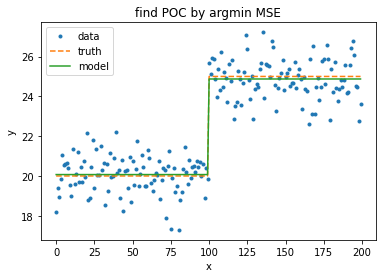

In [6]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.title("find POC by argmin MSE")
pl.legend();

This MSE method is like k-means clustering. Since there is only one POC, we know that number of cluster k = 2 already. We define the "centers" as the mean before and after. When we minimize the square distances of all points(value at different time steps), we minimized the MSE.

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [7]:
mu1, mu2 = 20, 25
s2 = 4
ys = np.concatenate([np.random.randn(100)  + mu1 , np.random.randn(100) * s2 + mu1])

In [8]:
def maxdiff(y, sigma=True):
  N = len(y)
  f = np.nanstd if sigma else np.nanmean
  poc, diff, before, after = 0, 0, np.nan, np.nan
  for i in range(1, N):
      diff_here = np.abs(f(y[i:]) -  f(y[:i]))
      if diff < diff_here:
          diff = diff_here
          poc = i
          before, after = f(y[:i]), f(y[i:])
  return(poc, before, after)  

print("poc: {:.2f}, standard deviation before: {:.2f}, standard deviation after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=False)))


poc: 100.00, standard deviation before: 0.91, standard deviation after: 3.59
poc: 199.00, mean before: 19.89, mean after: 13.49


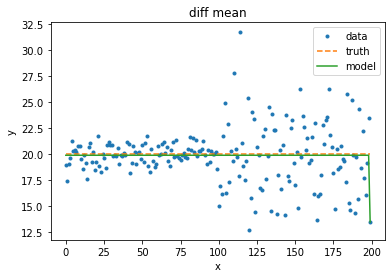

In [9]:
poc, before, after = maxdiff(ys, sigma=False) 
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [mu1] * 200 , '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ys) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.title("diff mean")
pl.legend();

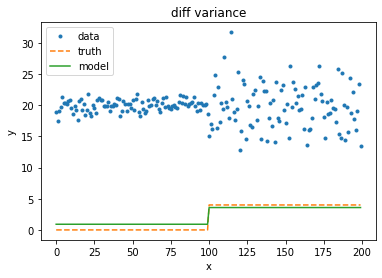

In [10]:
poc, before, after = maxdiff(ys, sigma=True) 
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [0] * 100 + [s2] * 100 , '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ys) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.title("diff variance")
pl.legend();

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

[100, 200]


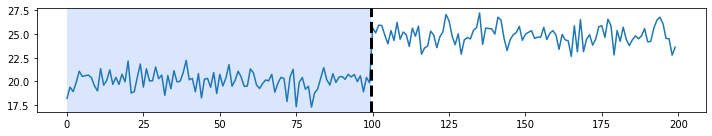

In [13]:
# detection
algo = rpt.Pelt(model='l1').fit(ym)
result = algo.predict(pen=10)
print(result)

# display
rpt.display(ym, [100], result)
pl.show()

In order to cluster two time series with different mean, the "l1" loss functions can work well. As practice, the appropriate hyperparameter pen is 10 to cluster the input timeseries into two parts

[100, 200]


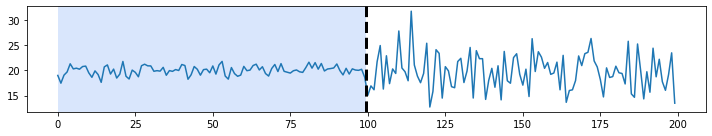

In [24]:
# detection
algo = rpt.Pelt(model='rbf').fit(ys)
result = algo.predict(pen=3)
print(result)

# display
rpt.display(ys, [100], result)
pl.show()

In order to cluster two timeseries with different variance, the "l1" and "l2" loss don't work, I use "rbf", kernel based loss instead.

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [25]:
eq1 = pd.read_csv("http://fbb.space/mltsa/LALNeq.csv", index_col=0)
eq1.describe()

,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06
mean,4.616407e+00,8.852012e-01
std,2.614006e+01,3.374432e-01
min,-4.621000e+03,3.008971e-01
25%,2.000000e+00,5.934956e-01
50%,5.000000e+00,8.849986e-01
75%,7.000000e+00,1.177597e+00
max,3.252000e+03,1.469100e+00


In [26]:
print(eq1.shape)
eq1.head()

(4500000, 2)


,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


# using rupture

Go through the documentation of rupture. 

Look at the "cost functions" and "search methos" tab here - https://centre-borelli.github.io/ruptures-docs/user-guide/ and the paper https://arxiv.org/pdf/1801.00718.pdf to find the computational cost associate to each method (Section 5).

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




Look at the "cost functions" and "search methos" tab here - https://centre-borelli.github.io/ruptures-docs/user-guide/ and the paper https://arxiv.org/pdf/1801.00718.pdf to find the computational cost associate to each method.





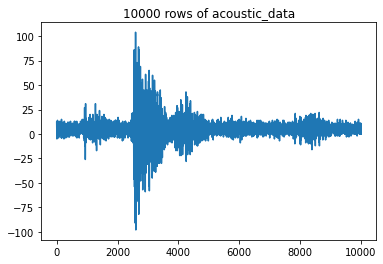

In [48]:
# Visualize Data with N = 1000; 5000; 10000
list_n = [1000, 5000, 10000]
n = 10000
label = eq1.keys()[0]
pl.plot(eq1[label][:n])
pl.title(str(n) +" rows of " + label )
data = eq1[label][:n].to_numpy()

From the plot of data, the whole timeseries has the mean of 0 but different variance at different parts. From the experiement practice above, the "rbf" should be used here isntead of "l1" and "l2". In general, it seems like there are mainly 4 POCs in the timeseries

- from 0 to 2200, the timeseries has variance around 20
- from 2200 to 2500, the timeseries has variance around 100
- from 2500 to 3500, the timeseries has variance around 50
- from 3500 to 5000, the timseries has variance around 30
- from 5000 to 10000, the timeseries has variance around 10

=> the hyperparameter min_size which defines minimum segment length will be set as 200 (300 is the length of second timeseries described above)

In order to faster the computation time, I will set the hyperparameter jump as 10

Moreover, since we want to cluster k+1 clusters (k change points). we will not use optimal method like Pelt, but aprroximate method like binseg, win or botup

Apply model with rbf loss on 10000 rows of acoustic data

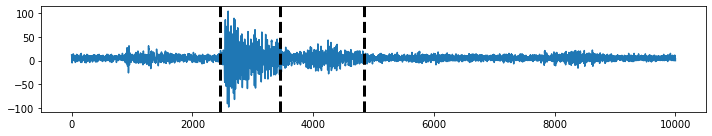

In [49]:
algo1 = rpt.Binseg(model='rbf', min_size = 200, jump = 10).fit(data)
result = algo1.predict(n_bkps=3)

# display
rpt.display(data, [], result)
plt.show()


From the results, the 4 clusters are totally different in variance which shows the model works find.

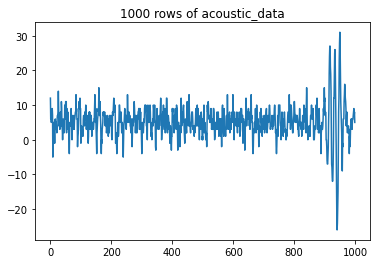

In [50]:
# Visualize Data with N = 1000
n = 1000
label = eq1.keys()[0]
pl.plot(eq1[label][:n])
pl.title(str(n) +" rows of " + label )
data = eq1[label][:n].to_numpy()

- from 0 to 800, the timeseries has variance around 10
- from 800 to 1000, the timeseries has variance around 30

=> the hyperparameter min_size which defines minimum segment length will be set as 50 (200 is the length of second timeseries described above)

In order to faster the computation time, I will set the hyperparameter jump as 5

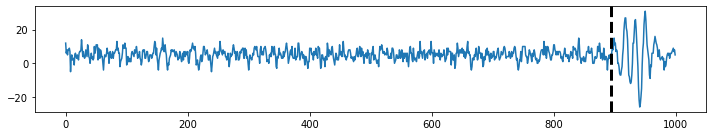

In [52]:
algo1 = rpt.Binseg(model='rbf', min_size = 50, jump = 5).fit(data)
result = algo1.predict(n_bkps=1)

# display
rpt.display(data, [], result)
plt.show()


The model perfectly cluster the timeseries into two part (0, 800) and (800, 1000) as analyzing above

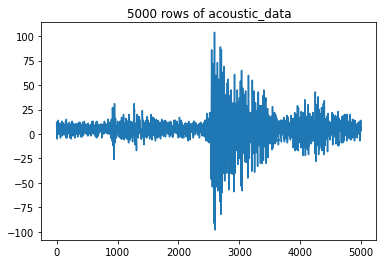

In [53]:
# Visualize Data with N = 1000
n = 5000
label = eq1.keys()[0]
pl.plot(eq1[label][:n])
pl.title(str(n) +" rows of " + label )
data = eq1[label][:n].to_numpy()

as k = 2, there are clearly 3 distinct clusters here
- from 0 to 2500, the timeseries has variance around 10-20
- from 2500 to 3500, the timeseries has variance around 80-100
- from 3500 to 5000, the timeseries has variance around 50

=> the hyperparameter min_size which defines minimum segment length will be set as 100 

In order to faster the computation time, I will set the hyperparameter jump as 10

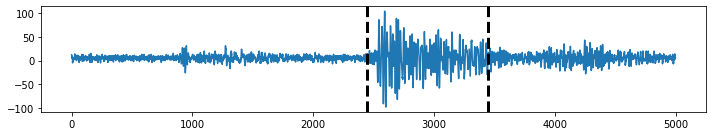

In [56]:
algo1 = rpt.Binseg(model='rbf', min_size = 50, jump = 10).fit(data)
result = algo1.predict(n_bkps=2)

# display
rpt.display(data, [], result)
plt.show()


The model cluster the time series well as described above. There's just a minor problem at second cluster which should start abit later.

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

The rupture change point detection has 3 elements: cost function, search method and constraint. AS discussed above, we will use "rbf" as cost function. For search method, the method that has computatital complexity O(NLog(N)) is binary search => We will use Binseg() function

3 chunks -> 2 POCs.
I will resuse the hyper parameter I used above but change k =3 -> k= 2

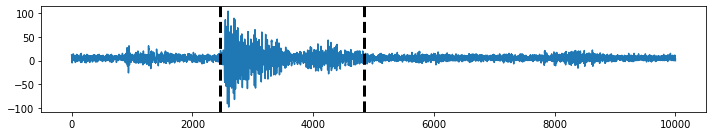

In [57]:
n = 10000
data = eq1[label][:n].to_numpy()

algo1 = rpt.Binseg(model='rbf', min_size = 200, jump = 10).fit(data)
result = algo1.predict(n_bkps=2)

# display
rpt.display(data, [], result)
plt.show()


In generall, the data of 10000 rows should be separated as 4 parts since there are clearly 4 distinct time series clusters here. However, to isolate the timeseries into 3 chunks, this still looks fine